In [2]:
import torch 
from torch import nn 
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt 

dataset contians : 
n_samples: 100, n_features:1

epoch:  0 	loss: 5811.5942 	parameters:[12.735933303833008, 1.051052451133728]
epoch:  10 	loss: 507.9349 	parameters:[69.8674545288086, 5.179738998413086]
epoch:  20 	loss: 338.5405 	parameters:[80.16741943359375, 4.439002513885498]
epoch:  30 	loss: 332.7752 	parameters:[82.05526733398438, 4.144094944000244]
epoch:  40 	loss: 332.5748 	parameters:[82.40459442138672, 4.072750568389893]
epoch:  50 	loss: 332.5678 	parameters:[82.4695816040039, 4.05772590637207]
epoch:  60 	loss: 332.5676 	parameters:[82.48170471191406, 4.054741382598877]
epoch:  70 	loss: 332.5675 	parameters:[82.48397827148438, 4.054164886474609]
epoch:  80 	loss: 332.5675 	parameters:[82.4843978881836, 4.0540547370910645]
epoch:  90 	loss: 332.5675 	parameters:[82.4844741821289, 4.054034233093262]
epoch:  100 	loss: 332.5676 	parameters:[82.4844741821289, 4.054030895233154]
epoch:  110 	loss: 332.5676 	parameters:[82.4844741821289, 4.054030895233154]


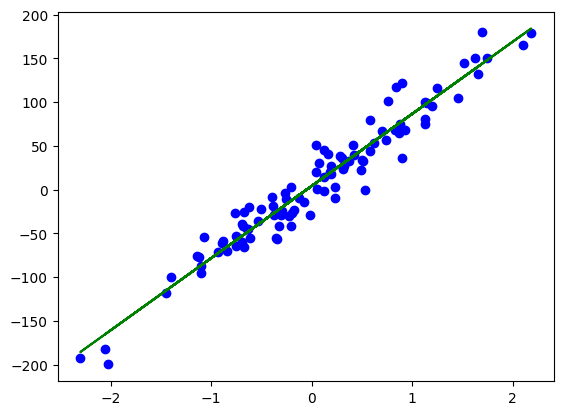

In [31]:
X_numpy , Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

# we need to reshape the Y cuz it's only an array 
Y = Y.view(Y.shape[0], 1)

n_samples , n_features = X.shape

print('dataset contians : ')
print(f'n_samples: {n_samples}, n_features:{n_features}')
print()

input_size = n_features
output_size = 1 


# create the model 
model = nn.Linear(input_size, output_size)

# specify the loss function 
learning_rate = 0.1
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs = 120

# train the model 
for epoch in range(epochs): 

    # forward pass 
    y_pred = model(X)

    # compute loss
    loss = criterion(Y,y_pred)

    # compute gradient (backward pass)
    loss.backward()

    # update the parameters 
    optimizer.step()

    # reset the gradient to zero 
    optimizer.zero_grad()

    if (epoch %10 == 0 ): 
        print(f'epoch:  {epoch} \tloss: {loss:.4f} \tparameters:{[param.item() for param in model.parameters()]}')



# plot 
predicted = model(X).detach().numpy() # detach is to prevent it from being in the computation graph 
plt.plot(X_numpy, Y_numpy, 'bo')
plt.plot(X_numpy, predicted, 'g' )
plt.show()



In [ ]:
import numpy as np 

# be like a chad and know the names of stuff without using AI or something else man, use the docs, refer to the docs, please! 